In [4]:
import pandas as pd
import numpy  as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import streamlit as st
import requests
from io import StringIO
import os
from pywaffle import Waffle
import plotly.express as px

# Conectar a la base de datos SQLite
conn = sqlite3.connect(r"C:\Users\maria\Documents\UCV MARY\EECA\SEMESTRE 2024-1\SEMESTRE II\COMPUTACIÓN II\TRABAJO FINAL\SALUD MENTAL EN LA INDUSTRIA TECNOLÓGICA 1.sqlite")

cur = conn.cursor()

In [5]:
# Consultar las tablas en la base de datos
consulta_ntablas = "SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;"


# Mostrar las entidades
print("Entidades en la base de datos:")
entidades = pd.read_sql_query(sql = consulta_ntablas, con = conn)
entidades

Entidades en la base de datos:


,name
0,Answer
1,Question
2,Respuestas
3,Survey


In [6]:
# Crear consulta para convertir en DF
consulta = "SELECT * FROM Respuestas;"

df_Respuestas = pd.read_sql_query(sql = consulta, con = conn)

conn.close()

In [7]:
# Filtrado del DF por desde 2016-2019 y Estados Unidos como país para realizar la Investigación
User_ID = df_Respuestas[(df_Respuestas['QuestionID'] == 3) & (df_Respuestas['AnswerText'] == 'Estados Unidos')]['UserID'].unique()

df_Investigacion1 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2016)]

df_Investigacion2 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2017)]

df_Investigacion3 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2018)]

df_Investigacion4 = df_Respuestas[(df_Respuestas['UserID'].isin(User_ID)) & (df_Respuestas['SurveyID'] == 2019)]

In [8]:
# Reestructuración del DF para mejor uso de Pandas
df_Investigacion1 = df_Investigacion1.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion2 = df_Investigacion2.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion3 = df_Investigacion3.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion4 = df_Investigacion4.groupby(['UserID', 'QuestionID'])['AnswerText'].first().reset_index()

df_Investigacion1 = df_Investigacion1.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion2 = df_Investigacion2.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion3 = df_Investigacion3.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

df_Investigacion4 = df_Investigacion4.pivot_table(index='UserID', columns='QuestionID', values='AnswerText', aggfunc='first')

In [9]:
# Renombrar las variables 2016
print(df_Investigacion1.columns)

df_Investigacion1.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', '¿Cree que los Miembros de su Equipo/Compañeros de Trabajo le Verían de Forma más Negativa Si Supieran que Padece una Enfermedad Mental?', 'Enfermedades Mentales Diagnosticadas', 'Enfermedades Mentales No Diagnosticadas', 'Puesto de Trabajo', 'Trabajo Remoto']

# Reemplazar los NaN
df_Investigacion1 = df_Investigacion1.fillna('No respondió')

Index([  1,   2,   3,   4,   5,   6,   7,   8,  10,  12,  14,  16,  17,  18,
        19,  20,  23,  24,  27,  28,  30,  31,  33,  34,  48,  49,  53,  54,
        55,  56, 114, 115, 116, 117, 118],
      dtype='int64', name='QuestionID')


In [10]:
# Renombrar las variables 2017
print(df_Investigacion2.columns)

df_Investigacion2.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion2 = df_Investigacion2.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [11]:
# Renombrar las variables 2018
print(df_Investigacion3.columns)

df_Investigacion3.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion3 = df_Investigacion3.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [12]:
# Renombrar las variables 2019
print(df_Investigacion4.columns)

df_Investigacion4.columns = ['Edad', 'Género', 'País de Residencia', 'Ciudad de Residencia (EEUU)', 'Trabajo Autónomo', 'Antecedentes Heredofamiliares', 'Búsqueda de Tratamiento con un Profesional', 'Cantidad de Empleados en la Empresa', 'Beneficios Dentro de Seguro Médico', 'Problemas de Salud Mental en Entrevista Laboral', 'Conocimiento de las Opciones de Cobertura por la Empresa Actual', 'Recursos de la Empresa Para Conocer sobre la Salud Mental y Canales de Ayuda', 'Facilidad de Consulta de Baja Médica en el Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con Compañeros de Trabajo', 'Comodidad para Hablar de una Enfermedad Mental con un Director/Supervisor', 'Cobertura de Salud Mental en Seguro Médico', 'Beneficios de Salud Mental de Empleos Anteriores', 'Conocimiento de las Opciones de Ayuda por el Empleo Anterior', 'Protección de Anonimato Si Se Toma Ventaja de los Recursos de Tratamiento en Empleos Anteriores', 'Disposición de Hablar de Salud Mental con un Supervisor', 'Disposición para Hablar Sobre Enfermedad Mental con Familia/Amigos', 'Seguridad de Revelar Enfermedad Mental Debido a Comentario Sobre Salud Mental de Otra Persona', 'Situación Mental Actual', '¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?', 'Nivel de Interferencia en el Trabajo Cuando Se Está Bajo Tratamiento', 'Nivel de Interferencia en el Trabajo Cuando No Se Está Bajo Tratamiento', 'Disposición a Revelar Enfermedad Mental a Empleados/Compañeros', 'Productividad Afectada Por Enfermedad Mental', 'Porcentaje de Tiempo Afectada Por Enfermedad Mental', '¿Has Observado o Experimentado una Respuesta Insolidaria o Mal Gestionada a un Problema de Salud Mental en tu Lugar de Trabajo Actual o Anterior?', 'Importancia a la Salud Mental (Empresa)', '¿Cómo Afectó la Relación con Alguien de tu Trabajo el Haberle Contado sobre tu Enfermedad Mental?', '¿Te Identificas Abiertamente en el Trabajo como una Persona con una Enfermedad Mental?', '¿Tu Carrera Se Ha Visto Afectada por Tener una Enfermedad Mental?', 'Si Supieran Que Padeces un Trastorno Mental, ¿Cómo Crees Que Reaccionarían los Miembros de tu Equipo/Compañeros de Trabajo?', '¿Has Observado o Experimentado una Respuesta Positiva De Compañeros/Jefes al Saber que Tienes una Enfermedad Mental?', '¿En qué Medida Cree que el Sector Tecnológico Apoya a los Empleados con Enfermedades Mentales?', 'Raza']

# Reemplazar los NaN
df_Investigacion4 = df_Investigacion4.fillna('No respondió')

Index([ 1,  2,  3,  4,  5,  6,  7,  8, 10, 12, 14, 16, 17, 18, 19, 20, 23, 24,
       27, 28, 30, 31, 33, 34, 48, 49, 53, 54, 55, 56, 65, 67, 78, 79, 81, 83,
       85, 89],
      dtype='int64', name='QuestionID')


In [13]:
# Carpeta donde deseas guardar los archivos CSV
output_folder = r"C:\Users\maria\Documents\UCV MARY\EECA\SEMESTRE 2024-1\SEMESTRE II\COMPUTACIÓN II\TRABAJO FINAL\CSV"

# Crear la carpeta si no existe
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Guardar los archivos CSV en la carpeta especificada
df_Investigacion1.to_csv(os.path.join(output_folder, 'Investigacion1.csv'), index=False)
df_Investigacion2.to_csv(os.path.join(output_folder, 'Investigacion2.csv'), index=False)
df_Investigacion3.to_csv(os.path.join(output_folder, 'Investigacion3.csv'), index=False)
df_Investigacion4.to_csv(os.path.join(output_folder, 'Investigacion4.csv'), index=False)

In [14]:
# HTML
# Título de la aplicación
st.title("Problemáticas y Estigmas de las Enfermedades Mentales en la Industria Tecnológica Estadounidense 2016-2019")

# Contenido de la página 1
st.header("Introducción")
st.write("Información de la Data Suministrada.")

# Contenido de la página 2
st.header("Visualización de los Datos")
st.write("Información de la Data Suministrada.")

@st.cache
def load_csv_from_github(url):
    response = requests.get(url)
    if response.status_code == 200:
        return pd.read_csv(StringIO(response.text))
    else:
        st.error("Failed to load data from GitHub.")
        return None

# URLs of CSV files in GitHub repository
urls = {
    '2016': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion1.csv',
    '2017': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion2.csv',
    '2018': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion3.csv',
    '2019': 'https://raw.githubusercontent.com/Marizaf23/Analisis-Estadistico-Salud-Mental-Tecnologia/95f59adcc416732d98f3b9aa494eb78cadd12c0d/CSV/Investigacion4.csv'
}

# Load CSV files from GitHub
df_2016 = load_csv_from_github(urls['2016'])
df_2017 = load_csv_from_github(urls['2017'])
df_2018 = load_csv_from_github(urls['2018'])
df_2019 = load_csv_from_github(urls['2019'])

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['2016', '2017', '2018', '2019'])

# Muestra el DataFrame correspondiente según la opción seleccionada
if option == '2016':
    st.dataframe(df_2016)
elif option == '2017':
    st.dataframe(df_2017)
elif option == '2018':
    st.dataframe(df_2018)
elif option == '2019':
    st.dataframe(df_2019)


2024-06-27 02:12:38.122 
  command:

    streamlit run C:\Users\maria\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-06-27 02:12:38.124 
`st.cache` is deprecated and will be removed soon. Please use one of Streamlit's new caching commands, `st.cache_data` or `st.cache_resource`.
More information [in our docs](https://docs.streamlit.io/develop/concepts/architecture/caching).

**Note**: The behavior of `st.cache` was updated in Streamlit 1.36 to the new caching logic used by `st.cache_data` and `st.cache_resource`.
This might lead to some problems or unexpected behavior in certain edge cases.

2024-06-27 02:12:38.125 No runtime found, using MemoryCacheStorageManager
2024-06-27 02:12:38.126 No runtime found, using MemoryCacheStorageManager
2024-06-27 02:12:40.100 Session state does not function when running a script without `streamlit run`


In [16]:
# PREGUNTA #1
#¿Cuántas personas en la industria tecnológica tienen una enfermedad mental diagnosticada y, dentro de este grupo, existe algún antecedente heredofamiliar dentro de este ámbito?

# Crea un selectbox con las opciones
option = st.selectbox('Año de Encuesta:', ['Todos','2016', '2017', '2018', '2019'])

if option == '2016':

    #Crear la tabla bivariante con pandas
    Pregunta2016_1 = pd.crosstab(df_2016['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2016['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2016_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2016_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2016_1 = Pregunta2016_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2016_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2016_1.rename(columns={'index': 'Enfermedad Mental'})

    st.dataframe(Pregunta2016_1, width=1500, height=177)


    # Crear la figura
    fig = go.Figure()
    fig.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[170, 76, 120],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))
    fig.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[70, 70, 333],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig.update_layout(
    barmode='stack',
    font=dict(
        color='rgb(0, 0, 0)'
        )
        )

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig, use_container_width=True)

elif option == '2017':

    #Crear la tabla bivariante con pandas
    Pregunta2017_1 = pd.crosstab(df_2017['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2017['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2017_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2017_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2017_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2017_1 = Pregunta2017_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2017_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    
    st.dataframe(Pregunta2017_1, width=800, height=212)

    # Crear la figura
    fig2017_1 = go.Figure()

    fig2017_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[0, 1, 3],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 61, 153)',
        line=dict(color='rgb(0, 61, 153)', width=2)
        )   
        ))

    fig2017_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[26, 55, 163],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))

    fig2017_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[85, 79, 85],
        name='No respondio',
        orientation='h',
    marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig2017_1.update_layout(barmode='stack')

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig2017_1, use_container_width=True)

elif option == '2018':
    
    #Crear la tabla bivariante con pandas
    Pregunta2018_1 = pd.crosstab(df_2018['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2018['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2018_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2018_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2018_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2018_1 = Pregunta2018_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2018_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])
    
    st.dataframe(Pregunta2018_1, width=800, height=212)

    # Crear la figura
    fig2018_1 = go.Figure()

    fig2018_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[1, 0, 1],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 61, 153)',
        line=dict(color='rgb(0, 61, 153)', width=2)
        )   
        ))

    fig2018_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[11, 35, 113],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))

    fig2018_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[59, 34, 58],
        name='No respondio',
        orientation='h',
    marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig2018_1.update_layout(barmode='stack')

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig2018_1, use_container_width=True)

elif option == '2019':

    #Crear la tabla bivariante con pandas
    Pregunta2019_1 = pd.crosstab(df_2019['¿Alguna Vez Has Sido Diagnosticado con una Enfermedad Mental?'], 
                        df_2019['Antecedentes Heredofamiliares'], 
                        margins=True, 
                        margins_name='Total')

    # Renombrar el índice
    Pregunta2019_1.index.name = "Antecedentes Heredofamiliares"
    
    # Agregar una fila debajo de los títulos de las columnas 
    Pregunta2019_1.loc['Enfermedad Mental'] = ['', '', '', '']

    Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i != 'Enfermedad Mental'])
    
    Pregunta2019_1.rename(columns={'index': 'Enfermedad Mental'})

    Pregunta2019_1 = Pregunta2019_1.reindex(['Enfermedad Mental'] + [i for i in Pregunta2019_1.index if i not in ['Enfermedad Mental', 'No respondió', 'Total']] + ['No respondió'] + ['Total'])

    st.dataframe(Pregunta2019_1, width=800, height=212)

        # Crear la figura
    fig2019_1 = go.Figure()

    fig2019_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[0, 1, 0],
        name='No tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(0, 61, 153)',
        line=dict(color='rgb(0, 61, 153)', width=2)
        )   
        ))

    fig2019_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[9, 25, 72],
        name='Tengo enfermedades mentales',
        orientation='h',
        marker=dict(
        color='rgb(77, 148, 255)',
        line=dict(color='rgb(77, 148, 255)', width=2)
        )
        ))

    fig2019_1.add_trace(go.Bar(
        y=['No tengo antecedentes heredofamiliares', 'No conozco mis antecedentes familiares', 'Tengo antecedentes familiares'],
        x=[35, 19, 43],
        name='No respondio',
        orientation='h',
    marker=dict(
        color='rgb(0, 102, 255)',
        line=dict(color='rgb(0, 102, 255)', width=2)
        )
        ))

    fig2019_1.update_layout(barmode='stack')

    # Mostrar la figura en Streamlit
    st.plotly_chart(fig2019_1, use_container_width=True)

DeltaGenerator()

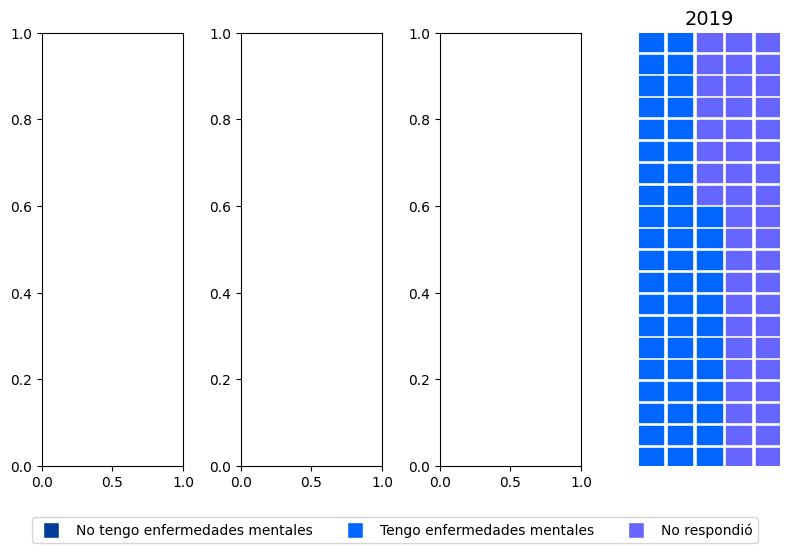

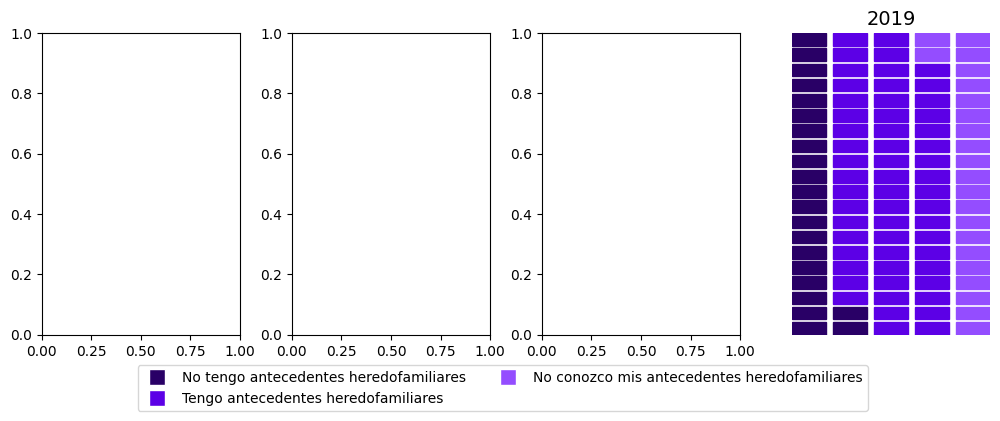

In [17]:
#Gráfica General de Enfermedades Mentales (Streamlit)
data_total1 = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],
    }

df_total1 = pd.DataFrame(data_total1,
                index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df_total1.columns)

fig_total1, axs = plt.subplots(nrows=1, ncols=number_of_bars, figsize=(8,6))

colors = ['#003d99', '#0066ff', '#6666ff']


for i, ax in enumerate(axs):
    col_name = df_total1.columns[i]
    values = df_total1[col_name]
    

    total = sum(values)
    normalized_values = [v/total for v in values]
    
Waffle.make_waffle(
    ax=ax,
    rows=20,
    columns=5,
    values=normalized_values,
    colors=colors
    )


ax.set_title(str(col_name), fontsize=14)

legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo enfermedades mentales', markerfacecolor=colors[0], markersize=12),
                plt.Line2D([0], [0], marker='s', color='w', label='Tengo enfermedades mentales', markerfacecolor=colors[1], markersize=12),
                plt.Line2D([0], [0], marker='s', color='w', label='No respondió', markerfacecolor=colors[2], markersize=12)]

fig_total1.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.85])
 
st.pyplot(fig_total1)

# Gráfica General de Antecedentes Heredofamiliares (Streamlit)

data_total2 = {
    2016: [240, 453, 146 ],
    2017: [111, 251, 135],
    2018: [71, 172, 69],
    2019: [44, 115, 45],
    }

df_total2 = pd.DataFrame(data_total2,
        index=['No tengo antecedentes heredofamiliares', 'Tengo antecedentes heredofamiliares', 'No conozco mis antecedentes heredofamiliares'])

number_of_bars = len(df_total2.columns)

fig_total2, axs = plt.subplots(nrows=1, ncols=number_of_bars, figsize=(12,8))

colors = ['#290066', '#5c00e6', '#944dff']

for i, ax in enumerate(axs):
    col_name = df_total2.columns[i]
    values = df_total2[col_name]
    
total = sum(values)
normalized_values = [v/total for v in values]
    
Waffle.make_waffle(
    ax=ax,
    rows=20,
    columns=5,
    values=normalized_values,
    colors=colors
    )

ax.set_title(str(col_name), fontsize=14)

legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo antecedentes heredofamiliares', markerfacecolor=colors[0], markersize=12),
                plt.Line2D([0], [0], marker='s', color='w', label='Tengo antecedentes heredofamiliares', markerfacecolor=colors[1], markersize=12),
                plt.Line2D([0], [0], marker='s', color='w', label='No conozco mis antecedentes heredofamiliares', markerfacecolor=colors[2], markersize=12)]

fig_total2.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=2)
        
plt.tight_layout(rect=[0, 0, 1, 0.85])

fig_total2.set_size_inches(10, 4) 
st.pyplot(fig_total2)

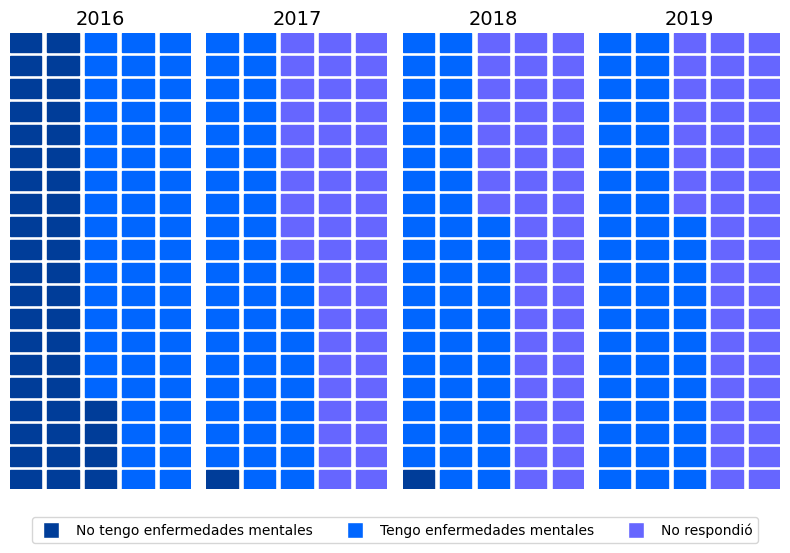

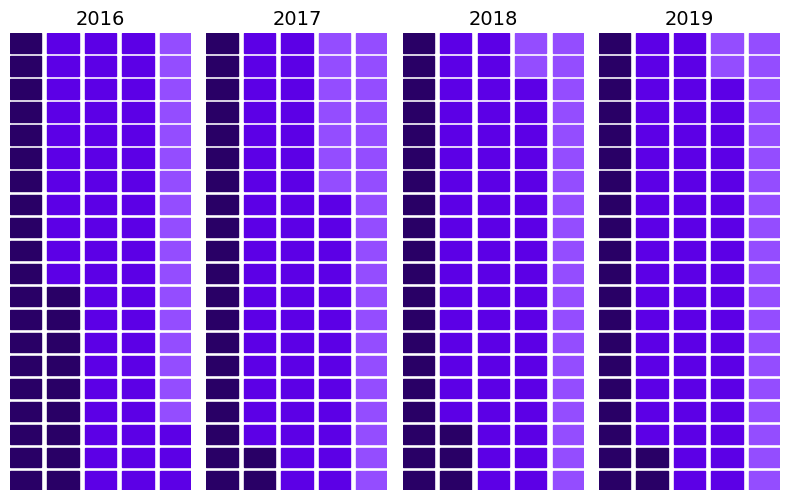

In [18]:
#Gráfica de Enfermedades Mentales General (Jupyter)

data_total1 = {
    2016: [366, 473, 0],
    2017: [4, 244, 249],
    2018: [2, 159, 151],
    2019: [1, 106, 97],

}

df_total1 = pd.DataFrame(data_total1,
                  index=['No tengo enfermedades mentales', 'Tengo enfermedades mentales', 'No respondió'])

number_of_bars = len(df_total1.columns)

# Init the whole figure and axes
fig_total1, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

# Define the colors
colors = ['#003d99', '#0066ff', '#6666ff']

# Iterate over each bar and create it
for i,ax in enumerate(axs):
    
    col_name = df_total1.columns[i]
    values = df_total1[col_name]
    
    Waffle.make_waffle(
        ax=ax,
        rows=20,
        columns=5,
        values=values,
        colors=colors
    )

    ax.set_title(str(col_name), fontsize=14)

legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo enfermedades mentales', markerfacecolor=colors[0], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='Tengo enfermedades mentales', markerfacecolor=colors[1], markersize=12),
                  plt.Line2D([0], [0], marker='s', color='w', label='No respondió', markerfacecolor=colors[2], markersize=12)]

fig_total1.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.85])

plt.show(fig_total1) 

#Gráfica de Antecedentes Heredofamiliares General (Jupyter)
data_total2 = {
    2016: [240, 453, 146 ],
    2017: [111, 251, 135],
    2018: [71, 172, 69],
    2019: [44, 115, 45],
}

df_total2 = pd.DataFrame(data_total2,
                index=['No tengo antecedentes heredofamiliares', 'Tengo antecedentes heredofamiliares', 'No conozco mis antecedentes heredofamiliares'])

number_of_bars = len(df_total2.columns)

fig_total1, axs = plt.subplots(nrows=1,
                        ncols=number_of_bars,
                        figsize=(8,6),)

colors = ['#290066', '#5c00e6', '#944dff']

for i,ax in enumerate(axs):
    
    col_name = df_total2.columns[i]
    values = df_total2[col_name]
    
    Waffle.make_waffle(
        ax=ax,
        rows=20,
        columns=5,
        values=values,
        colors=colors
    )

    ax.set_title(str(col_name), fontsize=14)

legend_handles = [plt.Line2D([0], [0], marker='s', color='w', label='No tengo antecedentes heredofamiliares', markerfacecolor=colors[0], markersize=12),
                plt.Line2D([0], [0], marker='s', color='w', label='Tengo antecedentes heredofamiliares', markerfacecolor=colors[1], markersize=12),
                plt.Line2D([0], [0], marker='s', color='w', label='No conozco mis antecedentes heredofamiliares', markerfacecolor=colors[2], markersize=12)]

fig_total2.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -0.01), ncol=3)
plt.tight_layout(rect=[0, 0, 1, 0.85])

plt.show(fig_total2) 

In [19]:
# PREGUNTA #4
# ¿Cuál es la enfermedad mental más común dentro de cada puesto de trabajo en la industria tecnológica estadounidense? ¿De este grupo cuántos trabajan remotamente?

# Filtrar los registros que no tienen 'No respondió' en la columna Enfermedades Mentales Diagnosticadas
df_2016_filtrado_1 = df_2016[df_2016['Enfermedades Mentales Diagnosticadas']!= 'No respondió']

# Crear un nuevo dataframe que muestra la enfermedad mental diagnosticada más común para cada puesto de trabajo
Pregunta4_1 = df_2016_filtrado_1.groupby('Puesto de Trabajo')['Enfermedades Mentales Diagnosticadas'].value_counts().reset_index(name='Número de Empleados')
Pregunta4_1 = Pregunta4_1.loc[Pregunta4_1.groupby('Puesto de Trabajo')['Número de Empleados'].idxmax()]
Pregunta4_1 = Pregunta4_1.sort_values(by='Número de Empleados', ascending=False)

# Agregar columna con información de trabajo remoto
Pregunta4_1['Trabajo Remoto'] = Pregunta4_1['Puesto de Trabajo'].apply(lambda x: df_2016_filtrado_1[df_2016_filtrado_1['Puesto de Trabajo'] == x]['Trabajo Remoto'].mode().values[0])

# Reordenar columnas
Pregunta4_1 = Pregunta4_1.loc[:, ['Puesto de Trabajo', 'Enfermedades Mentales Diagnosticadas', 'Trabajo Remoto', 'Número de Empleados']]

Pregunta4_1 = Pregunta4_1.sort_values(by='Número de Empleados', ascending=False)


In [20]:
# Filtrar los registros que no tienen 'No respondió' en la columna Enfermedades Mentales Diagnosticadas
df_2016_filtrado_2 = df_2016[df_2016['Enfermedades Mentales No Diagnosticadas']!= 'No respondió']

# Crear un nuevo dataframe que muestra la enfermedad mental diagnosticada más común para cada puesto de trabajo
Pregunta4_2 = df_2016_filtrado_2.groupby('Puesto de Trabajo')['Enfermedades Mentales No Diagnosticadas'].value_counts().reset_index(name='Número de Empleados')
Pregunta4_2 = Pregunta4_2.loc[Pregunta4_2.groupby('Puesto de Trabajo')['Número de Empleados'].idxmax()]
Pregunta4_2 = Pregunta4_2.sort_values(by='Número de Empleados', ascending=False)

# Agregar columna con información de trabajo remoto
Pregunta4_2['Trabajo Remoto'] = Pregunta4_2['Puesto de Trabajo'].apply(lambda x: df_2016_filtrado_2[df_2016_filtrado_2['Puesto de Trabajo'] == x]['Trabajo Remoto'].mode().values[0])

# Reordenar columnas
Pregunta4_2 = Pregunta4_2.loc[:, ['Puesto de Trabajo', 'Enfermedades Mentales No Diagnosticadas', 'Trabajo Remoto', 'Número de Empleados']]

Pregunta4_2 = Pregunta4_2.sort_values(by='Número de Empleados', ascending=False)


In [21]:
#PARA GRÁFICA 4.1

# Contar la frecuencia de cada enfermedad mental diagnosticada
Enfermedades2016_4_1 = df_2016_filtrado_1['Enfermedades Mentales Diagnosticadas'].value_counts().to_frame('Número de Empleados')

Enfermedades2016_4_1.drop(Enfermedades2016_4_1.index[13], inplace=True)

Enfermedades2016_4_1 = Enfermedades2016_4_1.reset_index(drop=False) 
Enfermedades2016_4_1 = Enfermedades2016_4_1.rename(columns={'index': 'Enfermedades Mentales Diagnosticadas'}) 
Enfermedades2016_4_1['Abreviatura'] = ['TA', 'TD/TB', 'TDAH', 'TEPT', 'TOC', 'TP', 'TCS', 'SRE', 'TP', 'TAE', 'LCT', 'TA', 'AS', 'TEP'] 
Enfermedades2016_4_1 = Enfermedades2016_4_1.loc[:, ['Abreviatura', 'Enfermedades Mentales Diagnosticadas', 'Número de Empleados']]

correcciones = {
    'Trastorno de Ansiedad (Genralizado, Social, Fobia, etc.)': 'Trastorno de Ansiedad (Generalizado, Social, Fobia, etc.)'}

Enfermedades2016_4_1['Enfermedades Mentales Diagnosticadas'] = Enfermedades2016_4_1['Enfermedades Mentales Diagnosticadas'].replace(correcciones)

# Contar la frecuencia de cada enfermedad mental no diagnosticada
Enfermedades2016_4_2 = df_2016_filtrado_2['Enfermedades Mentales No Diagnosticadas'].value_counts().to_frame('Número de Empleados')

Enfermedades2016_4_2 = Enfermedades2016_4_2.reset_index(drop=False)
Enfermedades2016_4_2 = Enfermedades2016_4_2.rename(columns={'index': 'Enfermedades Mentales No Diagnosticadas'})
Enfermedades2016_4_2['Abreviatura'] = ['TA', 'TD/TB', 'TDAH', 'TCS', 'TP', 'TEPT', 'TOC', 'DPP/A', 'SA', 'TEA', 'TCA']
Enfermedades2016_4_2 = Enfermedades2016_4_2.loc[:, ['Abreviatura', 'Enfermedades Mentales No Diagnosticadas', 'Número de Empleados']]

#PARA GRÁFICA 4.2

# Contar la frecuencia de cada puesto de trabajo
Trabajo2016_4 = df_2016_filtrado_1['Puesto de Trabajo'].value_counts().to_frame('Cantidad de Empleados')

# Pivot table para contar trabajo remoto
Trabajo2016_4 = df_2016_filtrado_1.pivot_table(index='Puesto de Trabajo', columns='Trabajo Remoto', aggfunc='size', fill_value=0)

# Agregar columna Total
Trabajo2016_4['Total'] = Trabajo2016_4.sum(axis=1)

# Renombrar columna Total a Número de Empleados
Trabajo2016_4 = Trabajo2016_4.rename(columns={'Total': 'Número de Empleados'})

# Reordenar columnas
Trabajo2016_4 = Trabajo2016_4.loc[:, ['Siempre', 'A veces', 'Nunca', 'Número de Empleados']]

# Ordenar por Total en orden descendente
Trabajo2016_4 = Trabajo2016_4.sort_values(by='Número de Empleados', ascending=False)


In [22]:
# Crear el gráfico con la columna 'Enfermedad Mental Diagnosticada' como eje y
fig20164_1 = px.bar(Enfermedades2016_4_1, x='Abreviatura', y='Número de Empleados', 
             title='Enfermedades Mentales Diagnosticadas',
             labels={'Abreviatura': 'Diagnóstico', 'Número de Empleados': 'Número de Empleados'},
             color='Abreviatura', color_discrete_sequence=['#004080', '#004d99', '#0059b3', '#0066cc', '#0073e6', '#0080ff', '#1a8cff', '#3399ff', '#4da6ff', '#66b3ff', '#80bfff', '#99ccff'],
             hover_name='Enfermedades Mentales Diagnosticadas')

# Histograma 2: Enfermedades no diagnosticadas
fig20164_2 = px.bar(Enfermedades2016_4_2, x='Abreviatura', y='Número de Empleados', 
             title='Enfermedades Mentales No Diagnosticadas',
             labels={'Abreviatura': 'Creencia', 'Número de Empleados': 'Número de Empleados'},
             color='Abreviatura', 
             color_discrete_sequence=['#400080', '#4d0099', '#5900b3', '#6600cc', '#7300e6', '#8000ff', '#8c1aff', '#9933ff', '#a64dff', '#b366ff', '#bf80ff'],
             hover_name='Enfermedades Mentales No Diagnosticadas')

fig20164_1.show()
fig20164_2.show()

In [23]:
Trabajo_Remoto = ['Programador(a) Back-End', 'Programador(a) Front-End', 'Supervisor(a)/Líder de Equipo', 'Director(a) Ejecutivo', 'Promotor(a) de Desarrollo', 'Administrador(a) de Sistemas', 'Soporte o Ayuda', 'Diseñador(a)', 'Emprendedor(a)', 'Otros', 'Vendedor(a)', 'Recursos Humanos']

fig20164_3 = go.Figure(data=[
    go.Bar(name='Siempre trabajo remoto', y=Trabajo_Remoto, x=[17, 11, 9, 9, 10, 12, 10, 3, 9, 4, 0, 0], orientation='h', marker_color='rgb(0, 89, 179)'),
    go.Bar(name='A veces trabajo remoto', y=Trabajo_Remoto, x=[57, 34, 26, 27, 25, 13, 11, 14, 8, 8, 2, 0], orientation='h', marker_color='rgb(0, 128, 255)'),
    go.Bar(name='Nunca trabajo remoto', y=Trabajo_Remoto, x=[23, 9, 11, 8, 5, 3, 1, 2, 2, 3, 1, 1], orientation='h', marker_color='rgb(102, 179, 255)')
])

fig20164_3.update_layout(barmode='stack',
                  margin=dict(l=200),
                  title=dict(text='Distribución de Puestos de Trabajo Según Trabajo Remoto',
                             font=dict(size=18)))
fig20164_3.show()

In [24]:
Trabajo_Remoto = ['Programador(a) Back-End', 'Programador(a) Front-End', 'Supervisor(a)/Líder de Equipo', 'Director(a) Ejecutivo', 'Promotor(a) de Desarrollo', 'Administrador(a) de Sistemas', 'Soporte o Ayuda', 'Diseñador(a)', 'Emprendedor(a)', 'Otros', 'Vendedor(a)', 'Recursos Humanos']
EM_Diagnosticadas = ['']

fig20164_4 = go.Figure(data=[
    go.Bar(name='Siempre trabajo remoto', y=Trabajo_Remoto, x=[17, 11, 9, 9, 10, 12, 10, 3, 9, 4, 0, 0], orientation='h', marker_color='rgb(0, 89, 179)'),
    go.Bar(name='A veces trabajo remoto', y=Trabajo_Remoto, x=[57, 34, 26, 27, 25, 13, 11, 14, 8, 8, 2, 0], orientation='h', marker_color='rgb(0, 128, 255)'),
    go.Bar(name='Nunca trabajo remoto', y=Trabajo_Remoto, x=[23, 9, 11, 8, 5, 3, 1, 2, 2, 3, 1, 1], orientation='h', marker_color='rgb(102, 179, 255)')
])

fig20164_3.update_layout(barmode='stack',
                  margin=dict(l=200),
                  title=dict(text='Distribución de Puestos de Trabajo Según Trabajo Remoto',
                             font=dict(size=18)))
fig20164_3.show()

In [85]:
#VARIABLES CUANTITATIVAS: DATOS

Edad_2016 = df_2016.dropna(subset=['Edad'])['Edad'].describe().to_frame().T.round(2)

Edad_2017 = df_2017['Edad'].describe().to_frame().T.round(2)

Edad_2018 = df_2018['Edad'].describe().to_frame().T.round(2)

Edad_2019 = df_2019.dropna(subset=['Edad'])['Edad'].describe().to_frame().T.round(2)

# Unir los DataFrames en uno
Edad_inv = pd.concat([Edad_2016, Edad_2017, Edad_2018, Edad_2019], ignore_index=True)

print(Edad_inv)

# Renombrar las filas con los años correspondientes
Edad_inv.index = ['2016', '2017', '2018', '2019']

# Renombrar las columnas
Edad_inv.columns = ['Muestra', 'Media', 'SD', 'Min', 'Q1', 'Md', 'Q3', 'Máx']

Edad_inv = Edad_inv[['Muestra', 'Media', 'Md', 'SD', 'Min', 'Máx', 'Q1', 'Q3']]

Edad_inv1 = Edad_inv

# Drop unnecessary columns
Edad_inv_graph = Edad_inv1.drop(['Muestra', 'SD'], axis=1)

fig_edad = px.box(Edad_inv_graph, x=Edad_inv_graph.index, y=Edad_inv_graph.columns, 
                 title='Distribución de Edades por Año', 
                 color_discrete_sequence=['#0033cc'])

fig_edad.update_layout(
    xaxis_title="Año",
    yaxis_title="Edades"
)

fig_edad.show()

   count   mean   std   min   25%   50%    75%   max
0  836.0  34.47  8.36  19.0  29.0  33.0  39.00  66.0
1  497.0  35.63  8.39  21.0  30.0  35.0  40.00  67.0
2  312.0  35.04  8.00  19.0  29.0  34.0  39.25  67.0
3  203.0  35.66  8.82  19.0  29.0  35.0  41.00  63.0
